In [1]:
import numpy as np
import matplotlib.pyplot as plt
import MigPreFuncoes

In [2]:
#Reproduzindo a figura do Tabti

****

### Criando o Modelo 

****

In [3]:
fr=40
nps=200
dt=.005 
rick=MigPreFuncoes.ricker(nps,fr,dt)

sx=10  #index position
sz=0  #index position
nx=110
nz=100;
dt=.005
dx=10  #meters
dz=dx  #meters
c=1992 #velocidade
tmax = np.sqrt((dx*nx)**2+(dz*nz)**2)*2/c
nt=int(np.ceil(tmax/dt+1))
#print(nt)
nd2=nt+1; 
W=np.zeros(2*nt);
#print(W.shape)
W[nt:nt+nps-1]=rick[0:nps-1];
x=np.arange(0,nx)
z=np.arange(0,nz)

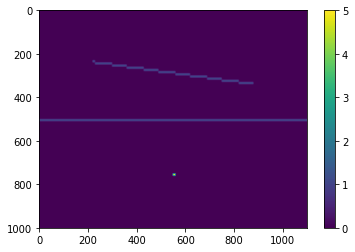

nx=110, nz=100
R.shape=(100, 110)


In [4]:
#Single Scatter

[X,Z]=np.meshgrid(x,z);
zz=(dz*Z)**2;
X=(dx*X);                                            # Compute X & Z Matrices
R=X*0.0;



#Refletor Horizontal    
for i in range(int(0),int(nx)):
    R[int(np.round(nz/2)),i]=1
    
    
#Refletor Dip
x_ini = int(np.round(1*nx/5))
x_fim = int(np.round(4*nx/5))
theta=30

for i in range(x_ini,x_fim):
    z = int(np.round(i*np.cos(theta)) + np.round(nz/5))
    R[z,i]=1

#Ponto Difrator
R[int(np.round(6*nz/8)),int(np.round(nx/2))]=5

#R[int(np.round(nz/2)),int(np.round(1*nx/6))]=1.0
#R[int(np.round(nz/2)),int(np.round(3*nx/6))]=1.0
#R[int(np.round(nz/2)),int(np.round(5*nx/6))]=1.0


#R[np.int(np.round(nz/2)),np.int(np.round(nx/2))]=1; # Compute Refl. Model for pt scatterer
#print('vel1',vel1.shape)

plt.imshow(R, extent=[0, nx*dx, nz*dz, 0], aspect='auto')
plt.colorbar()
plt.show()

print(f"nx={nx}, nz={nz}")
print(f"R.shape={R.shape}")

(100, 110)


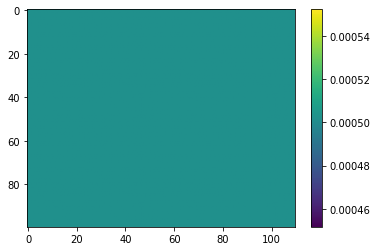

In [5]:
SW=np.ones([nz,nx])*1/c
print(SW.shape)
plt.imshow(SW, aspect="auto")
plt.colorbar()

*****

## Traçador de Raios

*******

In [6]:
## Essa linha só precisa ser rodada uma vez, quando mudamos o modelo de vagarosidade (SW)

#Armazenamos a TT no file.npy, acessado na próxima célula.

# Checar porquê TT[:,k,:] não é  simétrica (princípio da reciprocidade)

#TT=MigPreFuncoes.raymodel3(SW,dx,nx,"CSGhomo/raiosHomoBarra.npy")

In [7]:
with open('Data/CSG_diffbar/Tabti/raiosTabti.npy', 'rb') as f:
    TTh = np.load(f)

print(f"TTh.shape={TTh.shape}")

TTh.shape=(110, 100, 110)


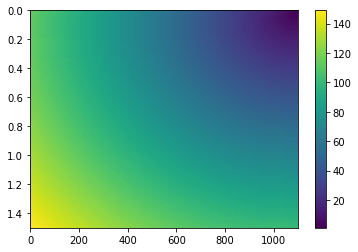

TSX.shape=(100, 110)


In [8]:
TSX = (TTh[-1,:,:]/dt+1).astype(int)  # Traveltime  (indexes)
plt.imshow(TSX,extent=[0, nx*dx, nt*dt, 0], aspect='auto')
plt.colorbar()
plt.show()

print(f"TSX.shape={TSX.shape}")

******

## Criando o Dado Sintético

******


### Create file with all shot gathers

nsx=nx #105  #numero de tiros (pode ser no máximo o valor de TTh axis=0)
ngx=nx #105   #numero de receptores (pode ser no máximo o valor de TTh axis=0)
#Loop over shots
for isx in range(0,nsx,5):
    print('shot', isx)
    D = np.zeros([nt,ngx])
    TSX = (TTh[isx,:,:]/dt+1).astype(int)  # Traveltime  (indexes)


    # Loop Over Traces
    for gx in range(0,ngx):
        TXG=(TTh[gx,:,:]/dt+1).astype(int)  # Traveltime in heterogeneous medium (indexes)
                         
      
        #Loop over time sample in a trace
        for t in range(0,nt):
            M=W[t-(TSX+TXG)+nt+1]*R
            D[t,gx]=np.sum(M.flatten('F'));
            #D[t,gx]=np.sum(M.flatten());
        gather1=np.diff(D[:,:],n=2,axis=0);
        
    filename = 'CSGhomo/gather_shotTabti{}'.format(isx)
    with open(filename, 'wb') as f:
        np.save(f, gather1)

#plt.imshow(np.diff(D),aspect='auto',extent=[0, nx*dx, nt*dt, 0])
plt.imshow(gather1,aspect='auto',extent=[0, nx*dx, nt*dt, 0])
plt.title('Synthetic CSG with Shot at %f m'%(sx*dx))
plt.xlabel('X (m)')
plt.ylabel('Time (s)')
plt.show()

In [9]:
files = []

for i in range(0,105,5):
    filename = 'Data/CSG_diffbar/Tabti/gather_shotTabti{}'.format(i)
    with open(filename, 'rb') as file:
        (gather) = np.load(file)
        files.append(gather)

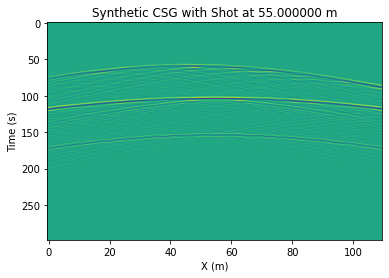

In [10]:
isx = 55 #55
filename = 'Data/CSG_diffbar/Tabti/gather_shotTabti{}'.format(int(isx))
with open(filename, 'rb') as file:
    gather1h = np.load(file)
    
plt.imshow(gather1h, aspect='auto')
plt.title('Synthetic CSG with Shot at %f m'%(int(isx)))
plt.xlabel('X (m)')
plt.ylabel('Time (s)')
plt.show()

len(tempos)=110
gathern.shape=(298, 110)


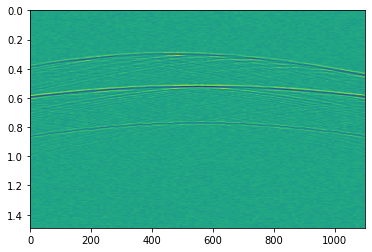

In [11]:
#Adicionando ruído
nx=110
nz=100;
dt=.005
dx=10
dz=dx
nsx=110
[nt,ntr] = gather1h.shape
nn = np.random.rand(nt,ntr)
gathern = gather1h+(nn-0.5)*2.0
plt.imshow(gathern, aspect='auto',extent=[0, dx*ntr,dt*nt, 0])
# Scatterer at [20,50]

timer=np.round(TTh/dt)+1;
txg = TTh[:,20,50]  # tempo do difrator em (20,50) ate os geofones
txs = TTh[50,20,50] # tempo do difrator em (20,50) ate o tiro em 50

tempos=txg + txs
pos_tiros=np.arange(0,dx*nsx,dx)

#plt.plot(pos_tiros,tempos)
print(f"len(tempos)={len(tempos)}")
print(f"gathern.shape={gathern.shape}")

In [12]:
#isx=0
igx=5

t = timer[isx,0:nz,0:nx] + timer[igx,0:nz,0:nx] 
trace1=gather1h.T[np.ix_([igx],t.flatten().astype(np.int32))]

print(np.shape(t))
print(isx)

(100, 110)
55


56.0
54.0
56.0
0.26858489017591974
0.25100401606425676
(110, 100, 110)
110 100 110


<ipython-input-13-4fda55012f63>:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(t[0,np.int((igx+isx)/2)+1])


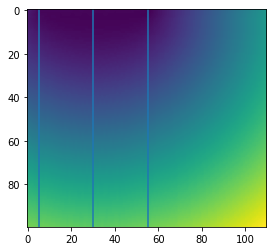

In [13]:
plt.imshow(t)
plt.axvline(x=igx)
plt.axvline(x=isx)
plt.axvline(x=(igx+isx)/2)
print(t[0,igx+1])
print(t[0,isx+1])
print(t[0,np.int((igx+isx)/2)+1])
print(TTh[isx,0,igx])
print(TTh[igx,0,isx])
print(TTh.shape)
print(ntr,nz,nx)

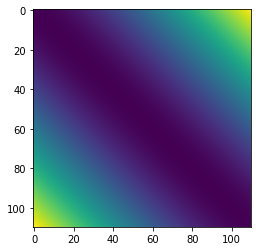

In [14]:
plt.imshow(TTh[:,50,:])

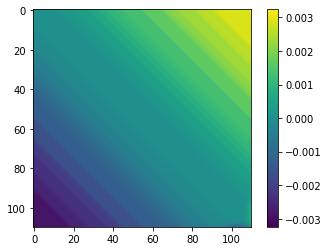

In [15]:
k=55
M=np.transpose(TTh[:,k,:]) - TTh[:,k,:]
plt.imshow(M)
plt.colorbar()

(110, 100)
(100, 110)
(110, 100, 110)
100


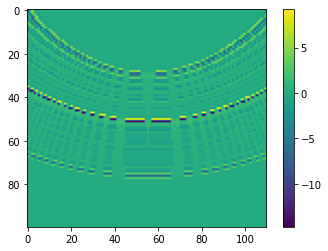

In [16]:
isx=55 #shot coordinate
profile=55  #profile coordinate

#timer=np.round(TTh/dt)+1;

tsx = TTh[isx,0:nz,profile] # é um vetor 1xnz, tempos de cada ponto no perfil chegar até isx
ttsx = np.tile(tsx,[nx,1]) # repete o vetor nx vezes, resulta matriz nx x nz
tgx = TTh[isx,0:nz,0:nx] # tempo de cada ponto no perfil chegar até  cada um dos receptores
t = ttsx.T + tgx #tempo de transito de isx, até ponto no perfil, até um receptor
t_disc = np.round(t/dt)+1
trace1=gather1h.T[np.ix_([isx],t_disc.flatten().astype(np.int32))]
trace1 = trace1.reshape([nz,nx]) #seção? imshow em um separado

plt.imshow(trace1)
plt.colorbar()

print(ttsx.shape)
print(np.shape(t))
print(np.shape(timer))
print(nz)

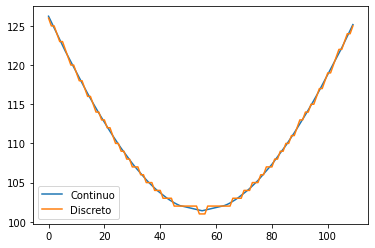

In [17]:
#plt.imshow(t)
#z=int(np.round(6*nz/8)) # pontinho
z= int(np.round(nz/2)) #refletor
x=int(np.round(nx/2))

plt.plot(t[z,:]/dt + 1,label='Continuo')
plt.plot(t_disc[z,:],label='Discreto') #tempo de trânsito isx-(profile,z)-igx (no perfil) 
plt.legend()

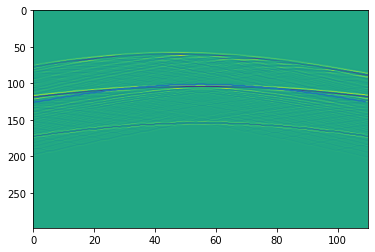

In [18]:
plt.imshow(gather1h, aspect='auto',extent=[0, ntr,nt, 0])
#plt.plot(np.linspace(0,dx*ntr,ntr),t[z,:])
x= np.arange(0,ntr,1).astype(np.int32)
#plt.plot(np.tile(isx,ntr),t_disc[z,:])
plt.plot(x,t_disc[z,:])





[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[7 8 9]]
(array([[2]]), array([[0, 1, 2]]))
(298, 110)


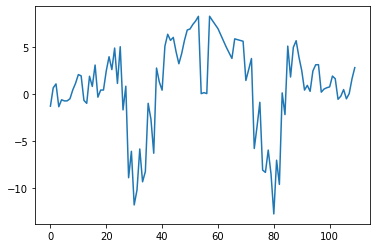

In [19]:
M = np.array([ [1,2,3],[4,5,6],[7,8,9]])
print(M)
#print(M[[1,1,1],[0,1,1]])

teste = np.array([0,1,2])
kk=np.ix_([2],teste)

print(M[kk])
print(kk)
t2 = t_disc[z,:]
iigx= np.arange(0,ntr,1).astype(np.int32)
amps=gather1h[t2.astype(np.int32),iigx]
plt.plot(amps)
print(gather1h.shape)
#Implementar uma sinc

In [20]:
for iigx in range(ntr):
    amps=gather1h[t2.astype(np.int32),iigx]

In [21]:
isx

55

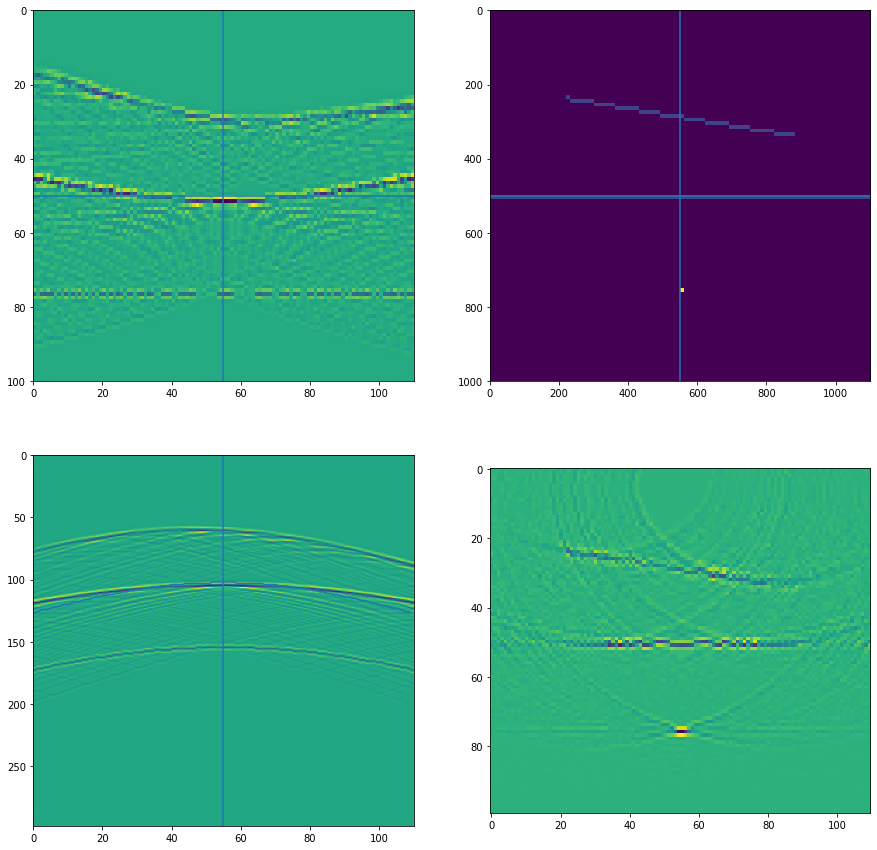

In [25]:
mig=np.zeros([nz,nx])
tabti=np.zeros([nz,ntr])
#profile=int(np.round(nx/2))
profile=55
z=int(np.round(6*nz/8)) # pontinho
tempo_d=np.zeros([nz,ntr])
for igx in range(0,ntr):
        t = timer[isx,0:nz,0:nx] + timer[igx,0:nz,0:nx] #t_{d}
        t2 = (t<nt)*t
        trace1=gather1h.T[np.ix_([igx],t2.flatten().astype(np.int32))] 
        trace1 = trace1.reshape([nz,nx]) #seção? imshow em um separado
        mig[0:nz,0:nx]=mig[0:nz,0:nx] + trace1
        tabti[0:nz,igx]=trace1[0:nz,profile]
        tempo_d[0:nz,igx]=t2[0:nz,profile]

        
zz=50

fig, ([ax1, ax2], [ax3,ax4]) = plt.subplots(2,2,figsize=(15, 15))

#fig.suptitle('Horizontally stacked subplots')
ax1.imshow(tabti,extent=[0, nx, nz, 0], aspect='auto')
ax1.axvline(x=profile)
#for iz in range(0,nz,10):
ax1.axhline(y=zz)


ax2.imshow(R, extent=[0, nx*dx, nz*dz, 0], aspect='auto')
ax2.axvline(x=profile*dx)
ax2.axhline(y=zz*dz)

ax3.imshow(gather1h, aspect='auto',extent=[0, ntr,nt, 0])
ax3.axvline(x=profile)



x= np.arange(0,ntr,1).astype(np.int32)
#plt.plot(np.tile(isx,ntr),t_disc[z,:])
#for iz in range(0,nz,10):
ax3.plot(x,tempo_d[zz,0:ntr])
    
ax4.imshow(mig)




In [23]:
mig=np.zeros([nz,nx])
tabti=np.zeros([nz,ntr])
#profile=int(np.round(nx/2))
profile=55
z=int(np.round(6*nz/8)) # pontinho
tempo_d=np.zeros([nz,ntr])
for igx in range(0,ntr):
        w = MigPreFuncoes.peso(TTh,dt,X,Y,igx,isx)

        t = timer[isx,0:nz,0:nx] + timer[igx,0:nz,0:nx] #t_{d}
        t2 = (t<nt)*t
        trace1=gather1h.T[np.ix_([igx],t2.flatten().astype(np.int32))] 
        trace1 = trace1.reshape([nz,nx]) #seção? imshow em um separado
        mig[0:nz,0:nx]=mig[0:nz,0:nx] + trace1
        tabti[0:nz,igx]=trace1[0:nz,profile]
        tempo_d[0:nz,igx]=t2[0:nz,profile]

        
zz=52

fig, ([ax1, ax2], [ax3,ax4]) = plt.subplots(2,2,figsize=(15, 15))

#fig.suptitle('Horizontally stacked subplots')
ax1.imshow(tabti,extent=[0, nx, nz, 0], aspect='auto')
ax1.axvline(x=profile)
#for iz in range(0,nz,10):
ax1.axhline(y=zz)


ax2.imshow(R, extent=[0, nx*dx, nz*dz, 0], aspect='auto')
ax2.axvline(x=profile*dx)
ax2.axhline(y=zz*dz)

ax3.imshow(gather1h, aspect='auto',extent=[0, ntr,nt, 0])
ax3.axvline(x=profile)



x= np.arange(0,ntr,1).astype(np.int32)
#plt.plot(np.tile(isx,ntr),t_disc[z,:])
#for iz in range(0,nz,10):
ax3.plot(x,tempo_d[zz,0:ntr])
    
ax4.imshow(mig)




NameError: name 'Y' is not defined

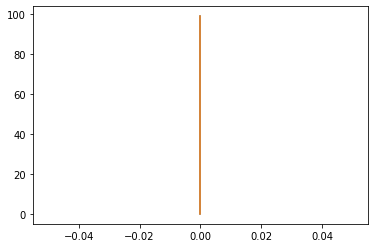

In [24]:
trace_tabti = np.sum(tabti,axis=1)
trace_mig=mig[:,profile]

#plt.imshow(mig)
plt.plot(trace_tabti,np.arange(0,nz))
plt.plot(trace_mig,np.arange(0,nz))


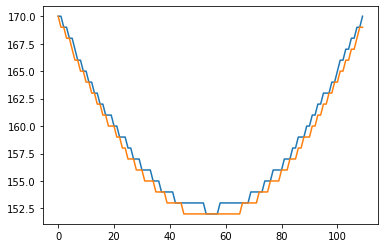

In [25]:
plt.plot(tempo_d)
plt.plot(t_disc[z,:],label='Discreto')


(100, 110)


[]

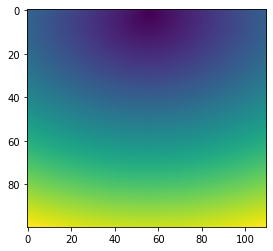

In [51]:
trace1 = trace1.reshape([nz,nx])

print(np.shape(trace1))
plt.imshow(t)
plt.plot()

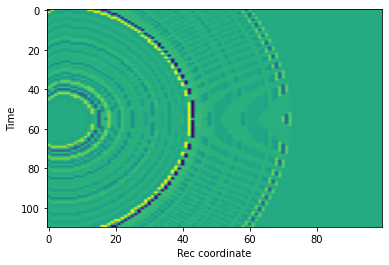

In [52]:
plt.imshow(trace1.T,aspect="auto")
plt.xlabel('Rec coordinate')
plt.ylabel('Time')
plt.show()